In [16]:
import cv2
import os
import random
import numpy as np
from sklearn.decomposition import PCA
from IPython.display import Image, display

def ipy_imshow(img):
    display(Image(data=cv2.imencode(".png", img)[1].tostring()))

## Load Olivetti Faces

Data originally taken using `from sklearn.datasets import fetch_olivetti_faces`

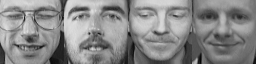

In [12]:
dataset_dir = r"olivetti_faces"

img_fns = [fn for fn in os.listdir(dataset_dir) if fn.endswith(".png")]
imgs = [cv2.imread(os.path.join(dataset_dir, fn), cv2.IMREAD_GRAYSCALE) for fn in img_fns]

# show a sample of the preprocessed images
ipy_imshow(np.hstack(random.sample(imgs, 4)))

### Flatten the images to prepare for PCA

400 images, each has 4096 pixels


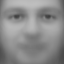

In [14]:
all_ims_flat = [im.flatten()/255.0 for im in imgs]
matrix = np.vstack(all_ims_flat)
immean = matrix.mean(axis=0)

print "%d images, each has %d pixels"%matrix.shape

ipy_imshow(immean.reshape(64,64)*255.0)

number of components for 0.80 variance: 27


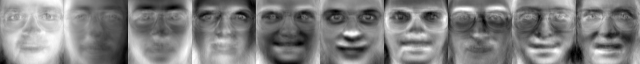

In [18]:
pca = PCA(n_components=200)
pca.fit(all_ims_flat)
transformed = pca.transform(all_ims_flat)

variance_thresh = 0.8

for num_components in range(len(pca.explained_variance_ratio_)):
    if sum(pca.explained_variance_ratio_[:num_components]) > variance_thresh: break
        
print "number of components for %.2f variance: %d"%(variance_thresh,num_components)

# visualize the top eigenvectors
princom_imgs = []
for eigen_vec in pca.components_[:10]:
    eigen_vec_img = eigen_vec.reshape(64,64).astype(np.float32)
    cv2.normalize(eigen_vec_img, eigen_vec_img, 0, 255, cv2.NORM_MINMAX)
    princom_imgs.append(eigen_vec_img)

ipy_imshow(np.hstack(princom_imgs))

Original Olliveti faces


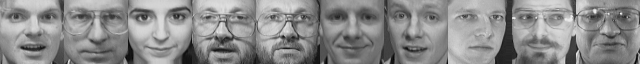

Eigenface approximations with [2, 4, 8, 16, 32, 64] components


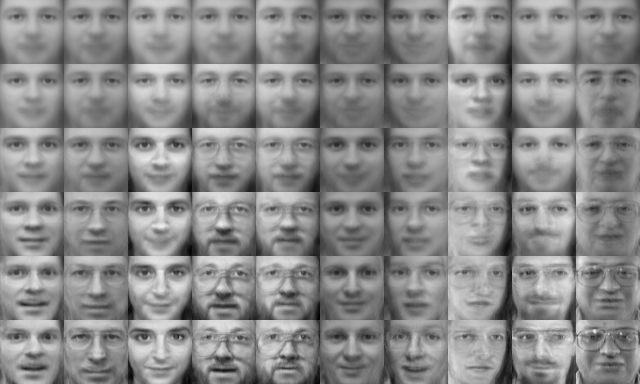

In [50]:
# indexes for eigenface vis
idxs = random.sample(range(len(all_ims_flat)), 10)
nums_princoms = [2**(i+1) for i in range(6)]

def get_eigenface_approximations(idxs, num_princoms):

    approxs = []
    for idx in idxs:
        result = np.zeros_like(all_ims_flat[idx])
        for p in range(num_princoms):
            result += transformed[idx][p]*pca.components_[p]
        approxs.append((result+immean).reshape(64,64)*255.0)
        
    return approxs

# show original images
print "Original Olliveti faces"
ipy_imshow(np.hstack([imgs[i] for i in idxs]))

# show different approximations
print "Eigenface approximations with %s components"%str(nums_princoms)
ipy_imshow(np.vstack([np.hstack(get_eigenface_approximations(idxs, n)) for n in nums_princoms]))